## Project Description
The palmer penguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

The dataset consists of 7 columns.

species: penguin species (Chinstrap, Adélie, or Gentoo)<br>
culmen_length_mm: culmen length (mm)<br>
culmen_depth_mm: culmen depth (mm)<br>
flipper_length_mm: flipper length (mm)<br>
body_mass_g: body mass (g)<br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)<br>
sex: penguin sex<br>


<table><tr>
<td> <img src="culmen.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="bodyparts.jpeg" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

## Step 1:
Choosing only the Adelie and Gentoo species data <br>
Droping 'rowid', 'island', 'sex', 'year' <br>

Resetting the index <br>

Creating another data frame for pca which has only the 'bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g' <br> 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
originaldata = pd.read_csv(r'penguins.csv')
print(originaldata.shape)
originaldata.head()

df = originaldata.dropna()
print(df.shape)

subsetdf = df[df["species"].isin(['Adelie', 'Gentoo'])]
print(subsetdf.shape)

subsetdf = subsetdf.drop(['rowid', 'island', 'sex', 'year'], axis=1)
print(subsetdf.shape)

subsetdf = subsetdf.reset_index(drop=True)

pcadf = subsetdf[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
print(pcadf.shape)
pcadf.head()


(344, 9)
(333, 9)
(265, 9)
(265, 5)
(265, 4)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


## Step 2:
Drawing a sublpot which shows all the 2D distributions of the various features (It will be a 2x3 and will show all the combinations of features such as bill_length_mm vs bill_depth_mm or bill_depth_mm vs body_mass_g <br>

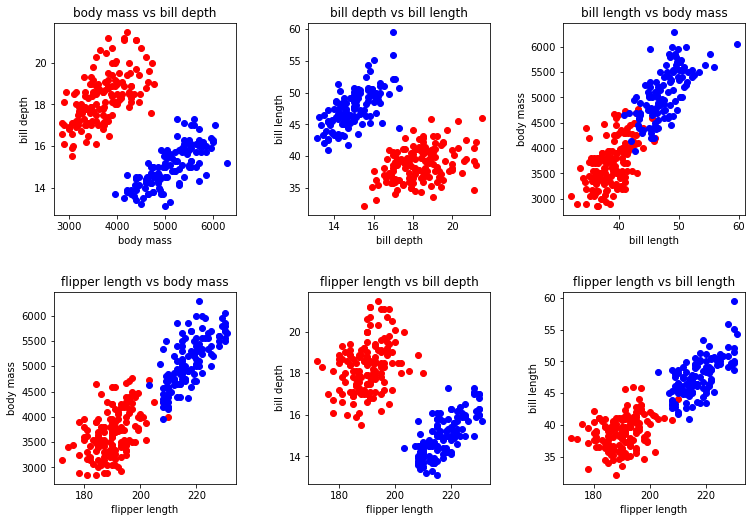

In [3]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.title('body mass vs bill depth')
plt.ylabel('bill depth')
plt.xlabel('body mass')
plt.scatter(subsetdf[subsetdf.species=="Adelie"].body_mass_g, subsetdf[subsetdf.species=="Adelie"].bill_depth_mm,color='r')
plt.scatter(subsetdf[subsetdf.species=="Gentoo"].body_mass_g, subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm,color='b')

plt.subplot(2,3,2)
plt.title('bill depth vs bill length')
plt.ylabel('bill length')
plt.xlabel('bill depth')
plt.scatter(subsetdf[subsetdf.species=="Adelie"].bill_depth_mm, subsetdf[subsetdf.species=="Adelie"].bill_length_mm,color='r')
plt.scatter(subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm, subsetdf[subsetdf.species=="Gentoo"].bill_length_mm,color='b')

plt.subplot(2,3,3)
plt.title('bill length vs body mass')
plt.ylabel('body mass')
plt.xlabel('bill length')
plt.scatter(subsetdf[subsetdf.species=="Adelie"].bill_length_mm, subsetdf[subsetdf.species=="Adelie"].body_mass_g,color='r')
plt.scatter(subsetdf[subsetdf.species=="Gentoo"].bill_length_mm, subsetdf[subsetdf.species=="Gentoo"].body_mass_g,color='b')

plt.subplot(2,3,4)
plt.title('flipper length vs body mass')
plt.ylabel('body mass')
plt.xlabel('flipper length')
plt.scatter(subsetdf[subsetdf.species=="Adelie"].flipper_length_mm, subsetdf[subsetdf.species=="Adelie"].body_mass_g,color='r')
plt.scatter(subsetdf[subsetdf.species=="Gentoo"].flipper_length_mm, subsetdf[subsetdf.species=="Gentoo"].body_mass_g,color='b')

plt.subplot(2,3,5)
plt.title('flipper length vs bill depth')
plt.ylabel('bill depth')
plt.xlabel('flipper length')
plt.scatter(subsetdf[subsetdf.species=="Adelie"].flipper_length_mm, subsetdf[subsetdf.species=="Adelie"].bill_depth_mm,color='r')
plt.scatter(subsetdf[subsetdf.species=="Gentoo"].flipper_length_mm, subsetdf[subsetdf.species=="Gentoo"].bill_depth_mm,color='b')

plt.subplot(2,3,6)
plt.title('flipper length vs bill length')
plt.ylabel('bill length')
plt.xlabel('flipper length')
plt.scatter(subsetdf[subsetdf.species=="Adelie"].flipper_length_mm, subsetdf[subsetdf.species=="Adelie"].bill_length_mm,color='r')
plt.scatter(subsetdf[subsetdf.species=="Gentoo"].flipper_length_mm, subsetdf[subsetdf.species=="Gentoo"].bill_length_mm,color='b')

plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.4, hspace=0.4)

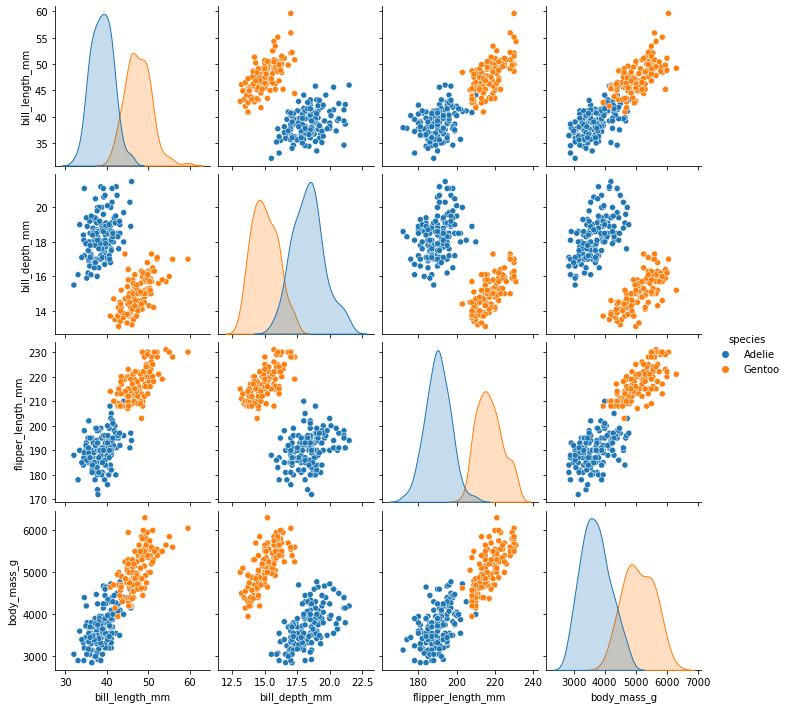

In [4]:
sns.pairplot(data=subsetdf, hue='species')

### Observation: 
As we can see from the above subplots, the data of the two groups in subplot 1 (body mass vs bill depth) are far from each other, so body mass and bill length are two features that are good to classify these two groups. 

## Step 3 PCA:
Applying PCA to the data <br>

figuring out how many principal dimensions are good to choose <br>

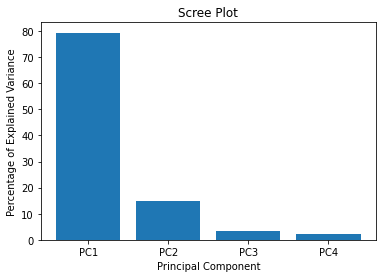

In [5]:
scaled_data = preprocessing.scale(pcadf)

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [6]:
print(per_var)

[79.4 15.   3.2  2.4]


## Step 4:
Drawing a 2-D and 3-D graphs using the best principal dimensions <br>

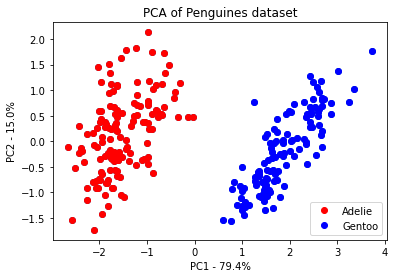

flipper_length_mm    0.538933
bill_length_mm       0.525514
body_mass_g          0.520090
bill_depth_mm       -0.403600
dtype: float64


In [7]:
#%matplotlib notebook   #This line of code to rotate 3D plots is causes errors
data_species=subsetdf["species"]
pca_df = pd.DataFrame(pca_data, index=data_species, columns=labels)

fig= plt.figure(1)

#for 3D representation
#ax = plt.axes(projection='3d')                  #for 3D representation
#ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3)  #for 3D representation
#ax.title('PCA of Penguines dataset')
#ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))  #for 3D representation
#ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))  #for 3D representation
#ax.set_zlabel('PC3 - {0}%'.format(per_var[2]))  #for 3D representation

#ax.plot(pca_df.PC1[pca_df.index == 'Adelie'], pca_df.PC2[pca_df.index == 'Adelie'], pca_df.PC3[pca_df.index == 'Adelie'],'bo', label="Adelie")
#ax.plot(pca_df.PC1[pca_df.index == 'Gentoo'], pca_df.PC2[pca_df.index == 'Gentoo'], pca_df.PC3[pca_df.index == 'Gentoo'],'co', label="Gentoo")

#for 2D representation
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA of Penguines dataset')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

plt.plot(pca_df.PC1[pca_df.index == 'Adelie'], pca_df.PC2[pca_df.index == 'Adelie'],'ro', label="Adelie")
plt.plot(pca_df.PC1[pca_df.index == 'Gentoo'], pca_df.PC2[pca_df.index == 'Gentoo'],'bo', label="Gentoo")


plt.rcParams["legend.shadow"]
plt.legend(loc='best')

plt.show()
# Determine which aspects had the biggest influence on PC1
loading_scores = pd.Series(pca.components_[0], index=pcadf.columns)

# Sort the scores
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# Show the names of the aspects
top_aspects = sorted_loading_scores[0:10].index.values
print(loading_scores[top_aspects])

### Observation:
it is better than the subplots in terms of seperation

## Step 5 Kmeans:
Applying Kmeans to the PCA Data <br>


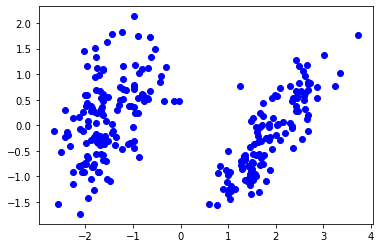

[0 0]
Kmeans labels array:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
Kmeans score:  -238.45258293268154


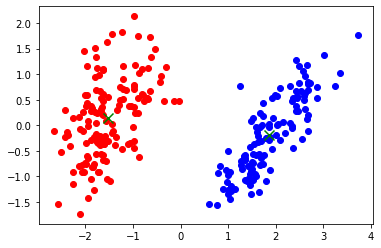

In [8]:
plt.scatter(pca_df.PC1, pca_df.PC2, color='blue')
plt.show()

#for 3D representation
#training_X = np.vstack((pca_df.PC1, pca_df.PC2, pca_df.PC3)).T

#for 2D representation
training_X = np.vstack((pca_df.PC1, pca_df.PC2)).T

kmeans = KMeans(n_clusters=2, random_state=0, max_iter=300)
kmeans.fit(training_X)

print(kmeans.predict([[100,80], [15,35]]))
print("Kmeans labels array: ",kmeans.labels_)
print("Kmeans score: ",kmeans.score(training_X))

#ax = plt.axes(projection='3d')      #for 3D representation

plt.figure(2)
for i in range(len(pca_df.PC1)):
    if kmeans.labels_[i]==0:
        #ax.scatter(pca_df.PC1[i], pca_df.PC2[i], pca_df.PC3[i], color='blue')     #for 3D representation
        plt.scatter(pca_df.PC1[i], pca_df.PC2[i], color='blue')
    else:
        #ax.scatter(pca_df.PC1[i], pca_df.PC2[i], pca_df.PC3[i], color='red')      #for 3D representation
        plt.scatter(pca_df.PC1[i], pca_df.PC2[i], color='red')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, marker='x', c='green')
plt.show()

### Observation:
We are able to seperate all the species correctly with Kmeans, as you can see from the above kmeans.labels_ array of 1's and 0's, there are 146 1's which are Adelie and there are 119 0's which are Gentoo. This data of the species is same as the csv file after deleting the NA's.

## Step 6 Neural Network:
Use Neural Network based classifier to find the members of each class using the best principal features. <br>
Your Code:

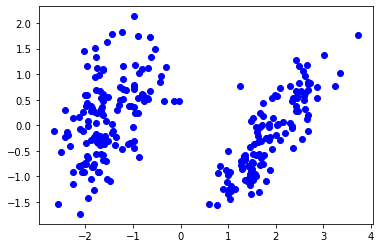

['Gentoo' 'Adelie']
Accuracy of MLPClassifier(in percentage) : 100.0
Final Loss Value : 0.2010704375543588
Final Iterations : 200


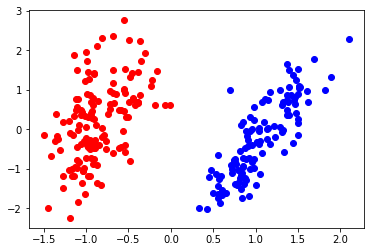

In [9]:
plt.scatter(pca_df.PC1, pca_df.PC2, color='blue')
plt.show()


training_X = np.vstack((pca_df.PC1, pca_df.PC2)).T
scaler = StandardScaler()
scaler.fit(training_X)
training_X = scaler.transform(training_X)  

training_Y = data_species


nn = MLPClassifier(solver='sgd', learning_rate='constant',learning_rate_init=0.001, hidden_layer_sizes=(20, 50), max_iter =200, random_state=1)
nn.fit(training_X, training_Y )


test_X = scaler.transform(np.array([[ 100, 80],[ 15, 35]]))
print(nn.predict(test_X))


plt.figure()
for i in range(len(training_X)):
    ans = nn.predict([[training_X[i,0],training_X[i,1]]])
    if ans=='Adelie':
        plt.scatter(training_X[i,0], training_X[i,1], color='red')
    else:
        plt.scatter(training_X[i,0], training_X[i,1], color='blue')


yp = nn.predict(training_X)


count  = 0;
for i in range(len(training_X)):
    if yp[i] == training_Y[i]:
        count +=1

accuracy = count/len(training_Y)*100


print('Accuracy of MLPClassifier(in percentage) :', accuracy)
print('Final Loss Value :', nn.loss_)
print('Final Iterations :', nn.n_iter_)

### Observation:
We are able to seperate all the species correctly with neural network, the accuracy is 100 percent.

## Step 7:
Choosing all the species and the sex column. And apply the same requirements listed in Step 3,4,5,6<br>

In [10]:
New_subsetdf = df.drop(['rowid', 'island', 'year'], axis=1)
print(New_subsetdf.shape)

New_subsetdf = New_subsetdf.reset_index(drop=True)

New_pcadf = New_subsetdf[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
print(New_pcadf.shape)
New_pcadf.head()

(333, 6)
(333, 4)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


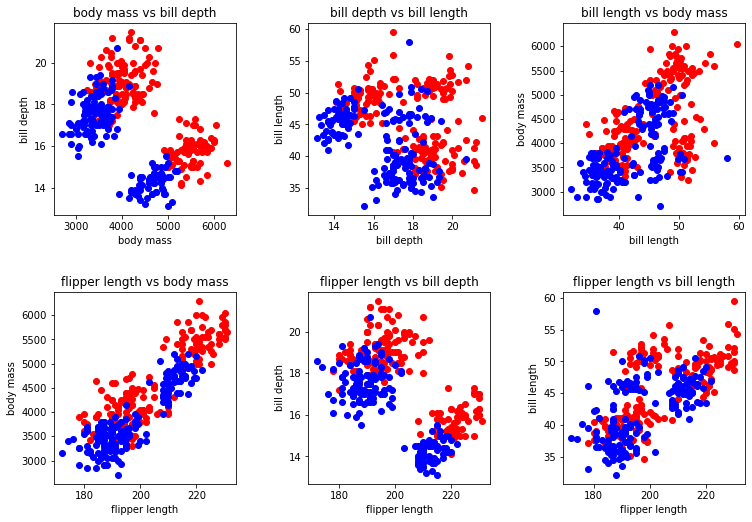

In [11]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.title('body mass vs bill depth')
plt.ylabel('bill depth')
plt.xlabel('body mass')
plt.scatter(New_subsetdf[New_subsetdf.sex=="male"].body_mass_g, New_subsetdf[New_subsetdf.sex=="male"].bill_depth_mm,color='r')
plt.scatter(New_subsetdf[New_subsetdf.sex=="female"].body_mass_g, New_subsetdf[New_subsetdf.sex=="female"].bill_depth_mm,color='b')

plt.subplot(2,3,2)
plt.title('bill depth vs bill length')
plt.ylabel('bill length')
plt.xlabel('bill depth')
plt.scatter(New_subsetdf[New_subsetdf.sex=="male"].bill_depth_mm, New_subsetdf[New_subsetdf.sex=="male"].bill_length_mm,color='r')
plt.scatter(New_subsetdf[New_subsetdf.sex=="female"].bill_depth_mm, New_subsetdf[New_subsetdf.sex=="female"].bill_length_mm,color='b')

plt.subplot(2,3,3)
plt.title('bill length vs body mass')
plt.ylabel('body mass')
plt.xlabel('bill length')
plt.scatter(New_subsetdf[New_subsetdf.sex=="male"].bill_length_mm, New_subsetdf[New_subsetdf.sex=="male"].body_mass_g,color='r')
plt.scatter(New_subsetdf[New_subsetdf.sex=="female"].bill_length_mm, New_subsetdf[New_subsetdf.sex=="female"].body_mass_g,color='b')

plt.subplot(2,3,4)
plt.title('flipper length vs body mass')
plt.ylabel('body mass')
plt.xlabel('flipper length')
plt.scatter(New_subsetdf[New_subsetdf.sex=="male"].flipper_length_mm, New_subsetdf[New_subsetdf.sex=="male"].body_mass_g,color='r')
plt.scatter(New_subsetdf[New_subsetdf.sex=="female"].flipper_length_mm, New_subsetdf[New_subsetdf.sex=="female"].body_mass_g,color='b')

plt.subplot(2,3,5)
plt.title('flipper length vs bill depth')
plt.ylabel('bill depth')
plt.xlabel('flipper length')
plt.scatter(New_subsetdf[New_subsetdf.sex=="male"].flipper_length_mm, New_subsetdf[New_subsetdf.sex=="male"].bill_depth_mm,color='r')
plt.scatter(New_subsetdf[New_subsetdf.sex=="female"].flipper_length_mm, New_subsetdf[New_subsetdf.sex=="female"].bill_depth_mm,color='b')

plt.subplot(2,3,6)
plt.title('flipper length vs bill length')
plt.ylabel('bill length')
plt.xlabel('flipper length')
plt.scatter(New_subsetdf[New_subsetdf.sex=="male"].flipper_length_mm, New_subsetdf[New_subsetdf.sex=="male"].bill_length_mm,color='r')
plt.scatter(New_subsetdf[New_subsetdf.sex=="female"].flipper_length_mm, New_subsetdf[New_subsetdf.sex=="female"].bill_length_mm,color='b')

plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.4, hspace=0.4)

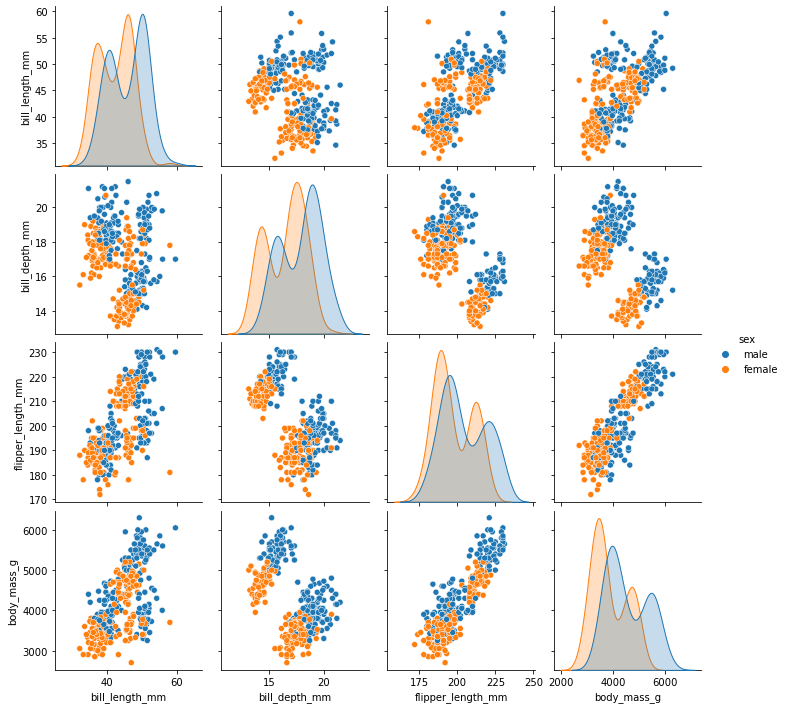

In [12]:
import seaborn as sns

sns.pairplot(data=New_subsetdf, hue='sex')

### Observaton:
As we can see from the above subplots, the data of the two groups in subplot 1 (body mass vs bill depth) has overlapping but the data seems to be more seperated when compared to other subplots. So, we can use these two features to classify these two groups.

## PCA

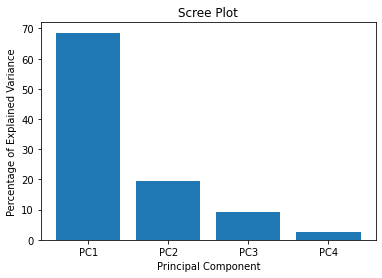

In [13]:
N_scaled_data = preprocessing.scale(New_pcadf)

N_pca = PCA()
N_pca.fit(N_scaled_data)
N_pca_data = N_pca.transform(N_scaled_data)

N_per_var = np.round(N_pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(N_per_var) + 1)]

plt.bar(x=range(1, len(N_per_var) + 1), height=N_per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

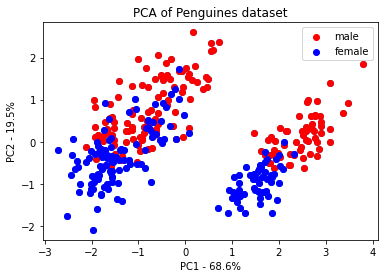

flipper_length_mm    0.576825
body_mass_g          0.549675
bill_length_mm       0.453753
bill_depth_mm       -0.399047
dtype: float64


In [14]:
N_data_sex=New_subsetdf["sex"]
N_pca_df = pd.DataFrame(N_pca_data, index=N_data_sex, columns=labels)

fig= plt.figure(3)

plt.scatter(N_pca_df.PC1, N_pca_df.PC2)
plt.title('PCA of Penguines dataset')
plt.xlabel('PC1 - {0}%'.format(N_per_var[0]))
plt.ylabel('PC2 - {0}%'.format(N_per_var[1]))

plt.scatter(N_pca_df.PC1[N_pca_df.index == 'male'], N_pca_df.PC2[N_pca_df.index == 'male'],color='red', label="male")
plt.scatter(N_pca_df.PC1[N_pca_df.index == 'female'], N_pca_df.PC2[N_pca_df.index == 'female'],color='blue', label="female")
plt.rcParams["legend.shadow"]
plt.legend(loc='best')

plt.show()
# Determine which aspects had the biggest influence on PC1
loading_scores = pd.Series(N_pca.components_[0], index=New_pcadf.columns)

# Sort the scores
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

# Show the names of the aspects
top_aspects = sorted_loading_scores[0:10].index.values
print(loading_scores[top_aspects])

<strong>Note</strong>: Here 3D representation is not used because the "%matplotlib notebook" code has bugs and is not projecting subsequent graphs.

### Observation:
The data is still overlapping so it is hard to determine if it is better than the subplots in terms of seperation.

## KMeans

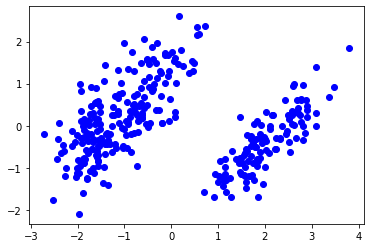

[0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
-394.23286929185963


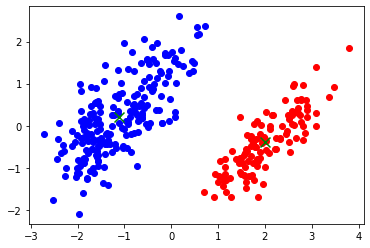

In [15]:
plt.scatter(N_pca_df.PC1, N_pca_df.PC2, color='blue')
plt.show()

training_X = np.vstack((N_pca_df.PC1, N_pca_df.PC2)).T

kmeans = KMeans(n_clusters=2, random_state=0, max_iter=300)
kmeans.fit(training_X)

print(kmeans.predict([[100,80], [15,35]]))
print(kmeans.labels_)
print(kmeans.score(training_X))

plt.figure(4)
for i in range(len(N_pca_df.PC1)):
    if kmeans.labels_[i]==0:
        plt.scatter(N_pca_df.PC1[i], N_pca_df.PC2[i], color='red')
    else:
        plt.scatter(N_pca_df.PC1[i], N_pca_df.PC2[i], color='blue')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, marker='x', c='green')
plt.show()

### Observation:
we are not able to seperate the sexes correctly with Kmeans.

## Neural Network with Original data without PCA

#### Body mass vs bill depth

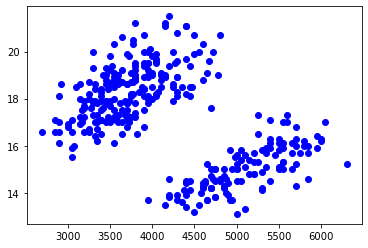

['male' 'male']
Accuracy of MLPClassifier(in percentage) : 90.69069069069069
Final Loss Value : 0.5126304513558221
Final Iterations : 200


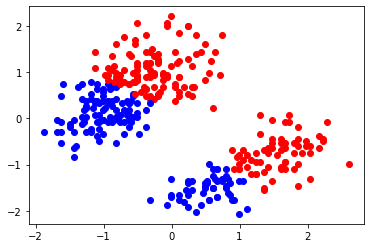

In [16]:
plt.scatter(New_subsetdf.body_mass_g, New_subsetdf.bill_depth_mm, color='blue')
plt.show()

# reshaping the data
training_X = np.vstack((New_subsetdf.body_mass_g, New_subsetdf.bill_depth_mm)).T
scaler = StandardScaler()
scaler.fit(training_X)
training_X = scaler.transform(training_X)  
# preparing the labeling 1- means successful, 0 means not
training_Y = N_data_sex

# neural network with hidden layers 25 500 200itns
nn = MLPClassifier(solver='sgd', learning_rate='constant',learning_rate_init=0.001, hidden_layer_sizes=(25, 500), max_iter =200, random_state=1)
nn.fit(training_X, training_Y )

# results
test_X = scaler.transform(np.array([[ 100, 80],[ 15, 35]]))
print(nn.predict(test_X))

# plotting
plt.figure()
for i in range(len(training_X)):
    ans = nn.predict([[training_X[i,0],training_X[i,1]]])
    if ans=='male':
        plt.scatter(training_X[i,0], training_X[i,1], color='red')
    else:
        plt.scatter(training_X[i,0], training_X[i,1], color='blue')

#Comparing the predictions against the actual observations
yp = nn.predict(training_X)

#check how many of them are predicted well
count  = 0;
for i in range(len(training_X)):
    if yp[i] == training_Y[i]:
        count +=1

accuracy = count/len(training_Y)*100

#Printing the accuracy
print('Accuracy of MLPClassifier(in percentage) :', accuracy)
print('Final Loss Value :', nn.loss_)
print('Final Iterations :', nn.n_iter_)

#### The accuracy increases from 89.789 to 90.690 when the hidden_layer_sizes is increased from (20, 50) to (25,500).

#### flipper_length_mm vs bill depth

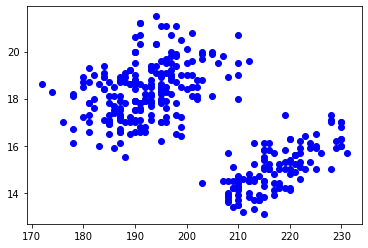

['male' 'male']
Accuracy of MLPClassifier(in percentage) : 83.48348348348348
Final Loss Value : 0.5873908707552572
Final Iterations : 200


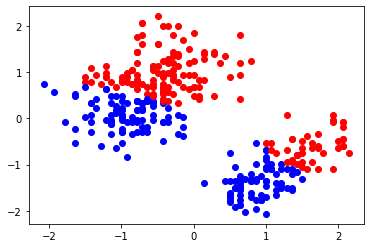

In [17]:
plt.scatter(New_subsetdf.flipper_length_mm, New_subsetdf.bill_depth_mm, color='blue')
plt.show()

# reshaping the data
training_X = np.vstack((New_subsetdf.flipper_length_mm, New_subsetdf.bill_depth_mm)).T
scaler = StandardScaler()
scaler.fit(training_X)
training_X = scaler.transform(training_X)  
# preparing the labeling 1- means successful, 0 means not
training_Y = N_data_sex

# neural network with hidden layers
nn = MLPClassifier(solver='sgd', learning_rate='constant',learning_rate_init=0.001, hidden_layer_sizes=(25, 500), max_iter =200, random_state=1)
nn.fit(training_X, training_Y )

# results
test_X = scaler.transform(np.array([[ 100, 80],[ 15, 35]]))
print(nn.predict(test_X))

# plotting
plt.figure()
for i in range(len(training_X)):
    ans = nn.predict([[training_X[i,0],training_X[i,1]]])
    if ans=='male':
        plt.scatter(training_X[i,0], training_X[i,1], color='red')
    else:
        plt.scatter(training_X[i,0], training_X[i,1], color='blue')

#Comparing the predictions against the actual observations
yp = nn.predict(training_X)

#check how many of them are predicted well
count  = 0;
for i in range(len(training_X)):
    if yp[i] == training_Y[i]:
        count +=1

accuracy = count/len(training_Y)*100

#Printing the accuracy
print('Accuracy of MLPClassifier(in percentage) :', accuracy)
print('Final Loss Value :', nn.loss_)
print('Final Iterations :', nn.n_iter_)

#### The accuracy increases from 82.582 to 83.483 when the hidden_layer_sizes is increased from (20, 50) to (25,500).

## Neural Network with PCA data

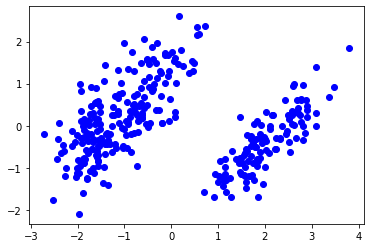

['male' 'male']
Accuracy of MLPClassifier(in percentage) : 83.18318318318319
Final Loss Value : 0.40343996618027705
Final Iterations : 400


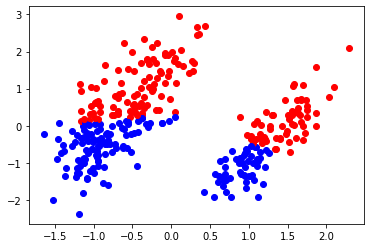

In [18]:
plt.scatter(N_pca_df.PC1, N_pca_df.PC2, color='blue')
plt.show()

# reshaping the data
training_X = np.vstack((N_pca_df.PC1, N_pca_df.PC2)).T
scaler = StandardScaler()
scaler.fit(training_X)
training_X = scaler.transform(training_X)  
# preparing the labeling 1- means successful, 0 means not
training_Y = N_data_sex

# neural network with hidden layers
nn = MLPClassifier(solver='sgd', learning_rate='constant',learning_rate_init=0.001, hidden_layer_sizes=(20, 10), max_iter =400, random_state=1)
nn.fit(training_X, training_Y )

# results
test_X = scaler.transform(np.array([[ 100, 80],[ 15, 35]]))
print(nn.predict(test_X))

# plotting
plt.figure()
for i in range(len(training_X)):
    ans = nn.predict([[training_X[i,0],training_X[i,1]]])
    if ans=='male':
        plt.scatter(training_X[i,0], training_X[i,1], color='red')
    else:
        plt.scatter(training_X[i,0], training_X[i,1], color='blue')

#Comparing the predictions against the actual observations
yp = nn.predict(training_X)

#check how many of them are predicted well
count  = 0;
for i in range(len(training_X)):
    if yp[i] == training_Y[i]:
        count +=1

accuracy = count/len(training_Y)*100

#Printing the accuracy
print('Accuracy of MLPClassifier(in percentage) :', accuracy)
print('Final Loss Value :', nn.loss_)
print('Final Iterations :', nn.n_iter_)

#### The accuracy increases from 81.381 to 83.183 when the hidden_layer_sizes is decreased from (20, 50) to (20,10) and the max_iter value is increased from 200 to 400.

The accuracy on applying neural network to body mass vs bill depth is more than the PCA data. The accuracy for body mass vs bill depth is 90.690 and PCA data is 81.183